# SpotRM API with Python: retrieving results with image

BSD 3-Clause License<br>
Copyright (c) 2020, Awametox AB<br>
You should have received a copy of the BSD 3-Clause License
along with this script; <br>
if not, see <https://github.com/Awamegit/SpotRM_API_examples/blob/master/LICENSE>


In [1]:
import requests
import json
from requests.auth import HTTPBasicAuth
import os
import datetime
from IPython.display import SVG # use in Jupyter

In [2]:
#
#  Start by defining the server, the access credentials and a few convenience shortcuts.
#
BASEURL = "https://www.spotrm.com/api/v1"
# Read the your SpotRM username / password from the environment:
authData = HTTPBasicAuth(os.environ["TEST_USERNAME"], os.environ["TEST_PASSWORD"])
# Could also encode it in clear text in the script but take care shareing it or
# using version control:
# authData = HTTPBasicAuth('my_email@somewhere.com', 'my_super_secure_PassW0rd!')

headers = {"content-type": "application/json"}

Example of getting and using an authorisation access token rather than sending
one's credentials with every request.

Here using a smiles string based search

In [3]:
#
# Function to retrieve an image highlighting the region in a query structure
# provided as a smiles string which triggers a particular reactive metabolite
# alert specified by its smarts id.
#
# Relevant smarts_id would be identified by an earlier search using the
# /api/v1/search/smarts/smiles route.
#
# Outputs an SVG image file smilesImage_<date>.svg
#
def getImage(smiles, smarts_id):
    url = BASEURL + "/get/image/smiles"
    query = {"smiles": smiles, "smarts_id": smarts_id}
    fileOutput = "smilesImage_" + str(datetime.datetime.now().date()) + ".svg"

    response = requests.post(
        url, data=json.dumps(query), headers=headers, auth=authData
    )
    if response.status_code == 200:
        with open(fileOutput, "wb") as f:
            f.write(response.content)
        display(SVG(filename=fileOutput))
    else:
        print("There was an error: " + json.loads(response.text)["message"])

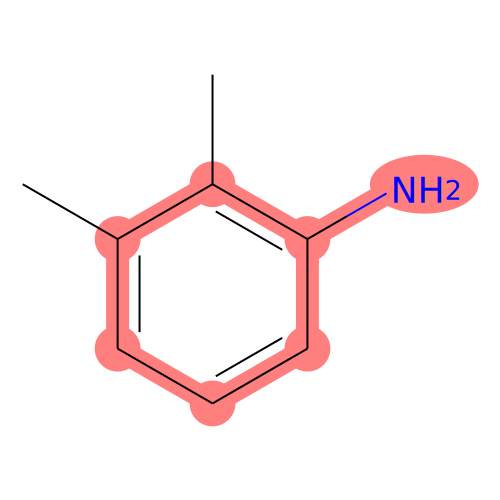

In [4]:
if __name__ == "__main__":

    getImage("c1ccc(C)c(C)c1N", 1)